In [14]:
import pandas as pd 
import matplotlib.pyplot as plt

In [6]:
hotel_index =  pd.read_sql('select * from hotel_index',con= 'sqlite:///database.db')
booking_date = pd.read_sql('select * from booking_date',con= 'sqlite:///database.db')
staying_date = pd.read_sql('select * from staying_date',con= 'sqlite:///database.db')



### Fixing the Dates Columns Format

In [7]:
booking_date['Booking Date and Time'] = pd.to_datetime(booking_date['Booking Date and Time'])
staying_date['Check In'] = pd.to_datetime(staying_date['Check In'])
staying_date['Check Out'] = pd.to_datetime(staying_date['Check Out'])

### Cutting the dataframe and making it only for the property and date. 

In [8]:
b_df = booking_date
b_df = b_df[['Property','Booking Date and Time']].drop_duplicates(subset=['Property','Booking Date and Time'],keep='first')
b_df = b_df.sort_values(by=['Property','Booking Date and Time'])


## Run through the dataset and return the number of stays in the stays table and return it to the df_booking table 

In [10]:
s_df = staying_date[['Property','Check In', 'Check Out']]

def count_occurrences(row):
    # Filter s_df where property matches
    mask = (s_df['Property'] == row['Property']) & \
           (s_df['Check In'] <= row['Booking Date and Time']) & \
           (s_df['Check Out'] > row['Booking Date and Time'])
    
    return mask.sum()  # Count occurrences

# Apply function to each row
b_df['Stays Count'] = b_df.apply(count_occurrences, axis=1)

# Display result
final_df = b_df

final_df = pd.merge(final_df,hotel_index[['Property','Total Rooms']],how='left')
final_df['Occ_rate'] = final_df['Stays Count']/final_df['Total Rooms']
final_df

,Property,Booking Date and Time,Stays Count,Total Rooms,Occ_rate
0,Apartments in the Heart of High Street Kensington,2025-03-01,2,3.0,0.666667
1,Apartments in the Heart of High Street Kensington,2025-03-02,1,3.0,0.333333
2,Apartments in the Heart of High Street Kensington,2025-03-03,2,3.0,0.666667
3,Apartments in the Heart of High Street Kensington,2025-03-04,2,3.0,0.666667
4,Apartments in the Heart of High Street Kensington,2025-03-06,1,3.0,0.333333
...,...,...,...,...,...
589,Wonderful Apartments near Portobello Road,2025-03-25,3,4.0,0.750000
590,Wonderful Apartments near Portobello Road,2025-03-27,4,4.0,1.000000
591,Wonderful Apartments near Portobello Road,2025-03-28,3,4.0,0.750000
592,Wonderful Apartments near Portobello Road,2025-03-30,4,4.0,1.000000


(array([20148., 20152., 20156., 20160., 20164., 20168., 20172., 20176.,
        20179.]),
 [Text(20148.0, 0, '2025-03-01'),
  Text(20152.0, 0, '2025-03-05'),
  Text(20156.0, 0, '2025-03-09'),
  Text(20160.0, 0, '2025-03-13'),
  Text(20164.0, 0, '2025-03-17'),
  Text(20168.0, 0, '2025-03-21'),
  Text(20172.0, 0, '2025-03-25'),
  Text(20176.0, 0, '2025-03-29'),
  Text(20179.0, 0, '2025-04-01')])

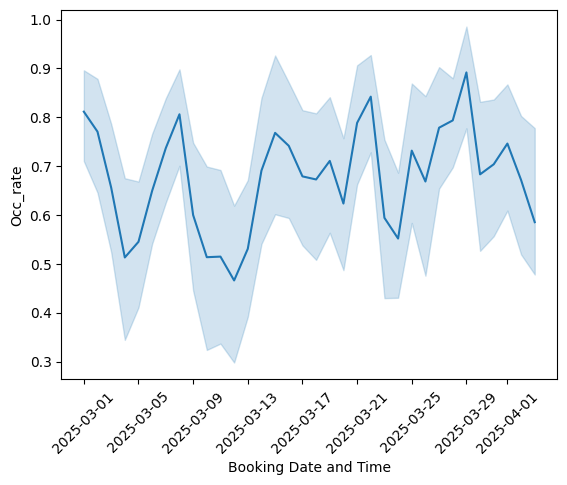

In [ ]:
import seaborn as sns

sns.lineplot(final_df,
             x=final_df['Booking Date and Time'],
             y=final_df['Occ_rate'],
             )
plt.xticks(rotation=45)
plt.xlabel('Booking Date and Time')